# Relatório de Análise VIII 

## Identificando e Removendo Outliers 

In [53]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

In [54]:
dados = pd.read_csv('aluguel.csv', sep = ';')

In [55]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,80.67,Apartamento
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,21.46,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,32.36,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,31.66,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,21.88,Apartamento
5,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,65.28,Apartamento
6,Apartamento,Freguesia (Jacarepaguá),3,0,0,54,950.0,300.0,28.0,23.67,Apartamento
7,Apartamento,Barra da Tijuca,2,1,1,67,1700.0,589.0,147.0,36.36,Apartamento
8,Apartamento,Tijuca,2,1,0,110,1900.0,700.0,138.0,24.89,Apartamento
9,Apartamento,Olaria,3,1,0,68,1000.0,670.0,0.0,24.56,Apartamento


<AxesSubplot:>

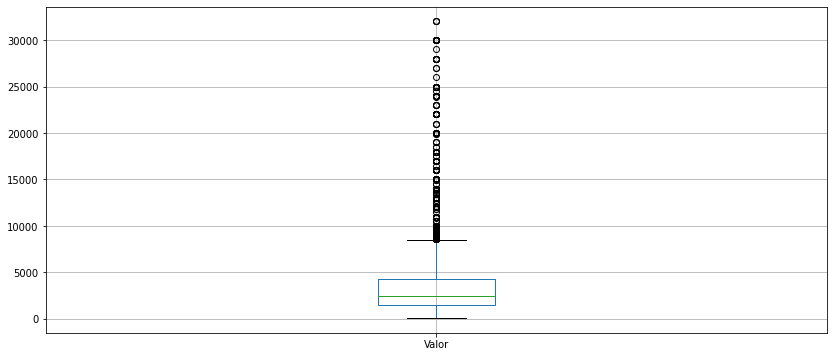

In [56]:
dados.boxplot(['Valor'])

In [57]:
dados[dados['Valor'] >=5000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
11,Apartamento,Ipanema,3,1,1,125,7000.0,2100.0,463.0,76.50,Apartamento
15,Apartamento,Copacabana,3,0,0,180,5500.0,1780.0,420.0,42.78,Apartamento
20,Apartamento,Copacabana,4,1,0,244,5000.0,2500.0,4100.0,47.54,Apartamento
31,Apartamento,Barra da Tijuca,4,3,3,153,6500.0,2300.0,434.0,60.35,Apartamento
35,Apartamento,Botafogo,3,1,1,108,5950.0,1405.0,289.0,70.78,Apartamento
39,Apartamento,Ipanema,3,2,1,150,8000.0,2400.0,0.0,69.33,Apartamento
40,Apartamento,Ipanema,3,1,1,140,7900.0,2900.0,500.0,80.71,Apartamento
49,Apartamento,Cosme Velho,3,4,0,130,5500.0,1407.0,246.0,55.02,Apartamento
55,Apartamento,Ipanema,3,1,1,120,7000.0,1800.0,370.0,76.42,Apartamento
64,Apartamento,Ipanema,3,1,1,145,8000.0,14768.0,4394.0,187.32,Apartamento


In [58]:
valor= dados['Valor']

In [59]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5*IIQ
limite_superior = Q3 + 1.5*IIQ

In [60]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

<AxesSubplot:>

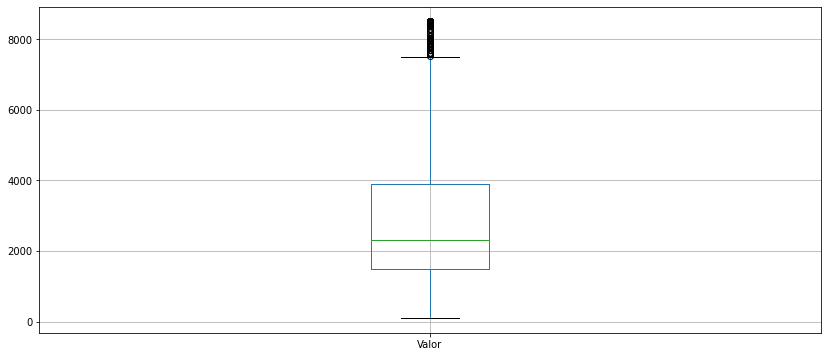

In [61]:
dados_new.boxplot(['Valor'])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

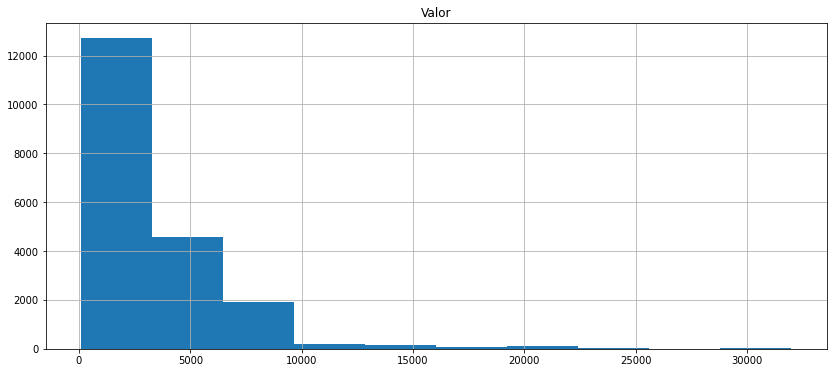

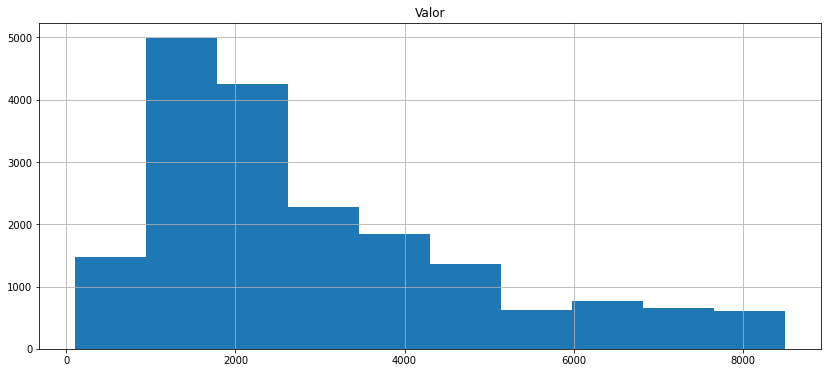

In [62]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

## Identificando e Removendo Outliers 

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

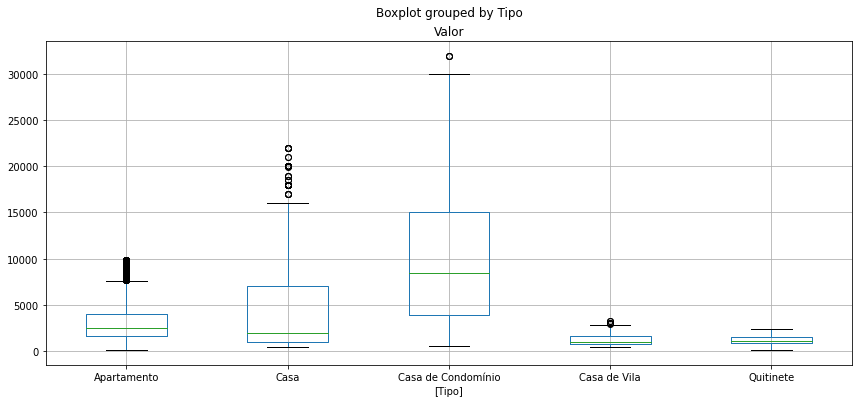

In [63]:
dados.boxplot(['Valor'], by = ['Tipo'])

In [64]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [65]:
type(grupo_tipo)

pandas.core.groupby.SeriesGroupBy

In [66]:
grupo_tipo.groups

{'Apartamento': Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                 9,
             ...
             16913, 16914, 16915, 16916, 16917, 16918, 16919, 16920, 16921,
             16922],
            dtype='int64', length=16923),
 'Casa': Int64Index([16923, 16924, 16925, 16926, 16927, 16928, 16929, 16930, 16931,
             16932,
             ...
             17811, 17812, 17813, 17814, 17815, 17816, 17817, 17818, 17819,
             17820],
            dtype='int64', length=898),
 'Casa de Condomínio': Int64Index([17821, 17822, 17823, 17824, 17825, 17826, 17827, 17828, 17829,
             17830,
             ...
             18775, 18776, 18777, 18778, 18779, 18780, 18781, 18782, 18783,
             18784],
            dtype='int64', length=964),
 'Casa de Vila': Int64Index([18785, 18786, 18787, 18788, 18789, 18790, 18791, 18792, 18793,
             18794,
             ...
             19008, 19009, 19010, 19011, 19012, 19013, 19014, 19015, 19016

In [67]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5*IIQ
limite_superior = Q3 + 1.5*IIQ

In [68]:
Q1

Tipo
Apartamento           1600.0
Casa                  1000.0
Casa de Condomínio    3900.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [69]:
Q3

Tipo
Apartamento            4000.0
Casa                   7000.0
Casa de Condomínio    15000.0
Casa de Vila           1600.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [70]:
IIQ

Tipo
Apartamento            2400.0
Casa                   6000.0
Casa de Condomínio    11100.0
Casa de Vila            850.0
Quitinete               600.0
Name: Valor, dtype: float64

In [71]:
limite_inferior

Tipo
Apartamento           -2000.0
Casa                  -8000.0
Casa de Condomínio   -12750.0
Casa de Vila           -525.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [72]:
limite_superior

Tipo
Apartamento            7600.0
Casa                  16000.0
Casa de Condomínio    31650.0
Casa de Vila           2875.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [73]:
limite_superior

Tipo
Apartamento            7600.0
Casa                  16000.0
Casa de Condomínio    31650.0
Casa de Vila           2875.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [79]:
limite_superior['Casa']

16000.0

<img src="Box-Plot.png" width=70%>

In [80]:
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados[selecao]
    

In [82]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

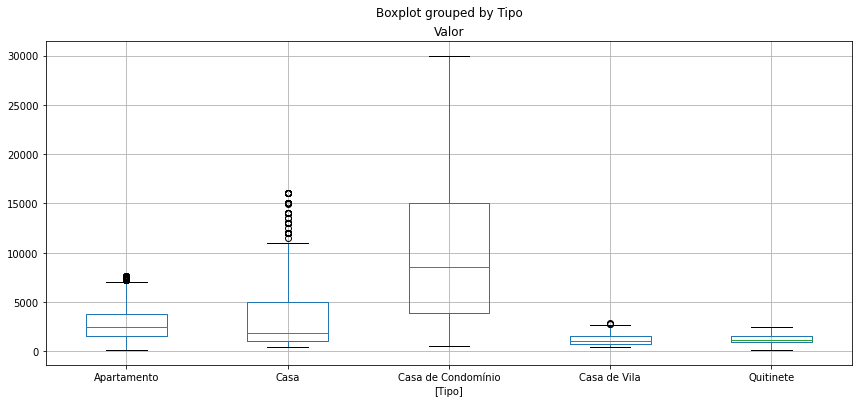

In [84]:
dados_new.boxplot(['Valor'], by = ['Tipo'])